FINAL PROJECT: NN&DL\
COMP-3704 (241552) Neural Networks and Deep Learning - FA2023 - Fall Term\
Instructor: Jon Ziprick\
Prepared by: Elizer Lising - 0382525

### Objective: 
To find a use case for image classification, multivariate time series forecasting, NLP and classification, or a GAN; to source the data and develop code to address the use case; to provide a written explanation of what is done along with an executive summary and conclusion. 

### Introduction
Rice from grain products is among the products produced in many countries and consumed all over the world. Rice is priced on various parameters in the market. Texture, shape, color and fracture rate are some of these parameters (Aukkapinyo et al. 2019).

For the Digital images of the products, various machine learning algorithms are used to determine these parameters and perform classification operations.

Machine learning algorithms ensure that large amounts of data are analyzed quickly and reliably. It is important to use such methods in rice production to improve the quality of the final product and to meet food safety criteria in an automated, economical, efficient and non-destructive way (Al-Jarrah et al., 2015, Zareiforoush et al., 2015, Grinberg et al., 2020).

### Abstract/Dataset
Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features. These are usually features such as texture, shape, and color. With these features that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds.\
In this study, Arborio, Basmati, Ipsala, Jasmine and Karacadag, which are five different varieties of rice often were used.

A total of 75,000 grain images, 15,000 from each of these varieties, are included in the dataset. A second dataset with 106 features including 12 morphological, 4 shape and 90 color features obtained from these images was used.

Models are created by using Artificial Neural Network (ANN) and Deep Neural Network (DNN) algorithms for the feature dataset and by using the Convolutional Neural Network (CNN) algorithm for the image dataset, and classification processes will be performed.

In [1]:
## install requirement tools and libraries
# split-folders is a Python library used for splitting a dataset of files into training, validation, and test sets.
!pip install split-folders

In [10]:
# import requirement libraries and tools
import os
import pathlib
import itertools
import splitfolders
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots

from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

import pathlib  # The pathlib module offers a set of classes to handle filesystem paths.
import itertools # # The itertools module in Python provides a set of fast, memory-efficient tools for working with iterators

## The splitfolders library simplifies the process of dividing a dataset into different subsets for training, validation, and testing, 
## ensuring that the division is done in a balanced and consistent manner.
import splitfolders  

In [11]:
# To enable dynamic memory allocation, run the following commands 
# at the start of the session :
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## *Preprocessing the Data*

In [12]:
## Loading the Dataset
## Dataset path
data_path = 'Rice_Image_Dataset'

In [13]:
# The splitfolders library simplifies the process of dividing a dataset into different subsets for training, validation, and testing,
# ensuring that the division is done in a balanced and consistent manner. In this case:
# 70% training set // 20% validation set // 10% test set.

splitfolders.ratio(input=data_path, output='rice_imgs', seed=42, ratio=(0.7, 0.2, 0.1))

Copying files: 0 files [00:00, ? files/s]

Copying files: 75000 files [29:59, 41.68 files/s]


In [14]:
import tensorflow as tf
from tensorflow import keras

# store training, validation and testing set from directory
BATCH_SIZE = 16
# resize the images from the directories to prevent ResourceExhaustedError
IMAGE_SIZE = (150, 150)

## load image datasets from directories for training, validation, and testing.
def load_dataset(directory, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE):
    return keras.utils.image_dataset_from_directory(
        directory=directory,
        labels='inferred',
        label_mode='int',
        batch_size=batch_size,
        image_size=image_size,
        seed=42,
    )

# Load training dataset
Train = load_dataset('rice_imgs/train', batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)

# Load validation dataset
Validation = load_dataset('rice_imgs/val', batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)

# Load testing dataset
Test = load_dataset('rice_imgs/test', batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)

Found 52500 files belonging to 5 classes.
Found 15000 files belonging to 5 classes.
Found 11250 files belonging to 5 classes.


In [15]:
# check class in each 
for i in [Train, Validation, Test]:
    class_names = i.class_names
    print(class_names)

# Iterates over datasets (Train, Validation, Test), extracts and prints class names associated with each dataset

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [16]:
## check shape of train, validation, test
def print_dataset_info(dataset, dataset_name):
    for image_batch, labels_batch in dataset.take(1):
        print(f"{dataset_name} Shape: {image_batch.shape} (Batches = {len(dataset)})")
        print(f"{dataset_name} Labels: {labels_batch.shape}\n")

print_dataset_info(Train, "Train")
print_dataset_info(Validation, "Validation")
print_dataset_info(Test, "Test")

### The information on the dataset's dimensions and the number of batches in the dataset.

Train Shape: (16, 150, 150, 3) (Batches = 3282)
Train Labels: (16,)

Validation Shape: (16, 150, 150, 3) (Batches = 938)
Validation Labels: (16,)

Test Shape: (16, 150, 150, 3) (Batches = 704)
Test Labels: (16,)



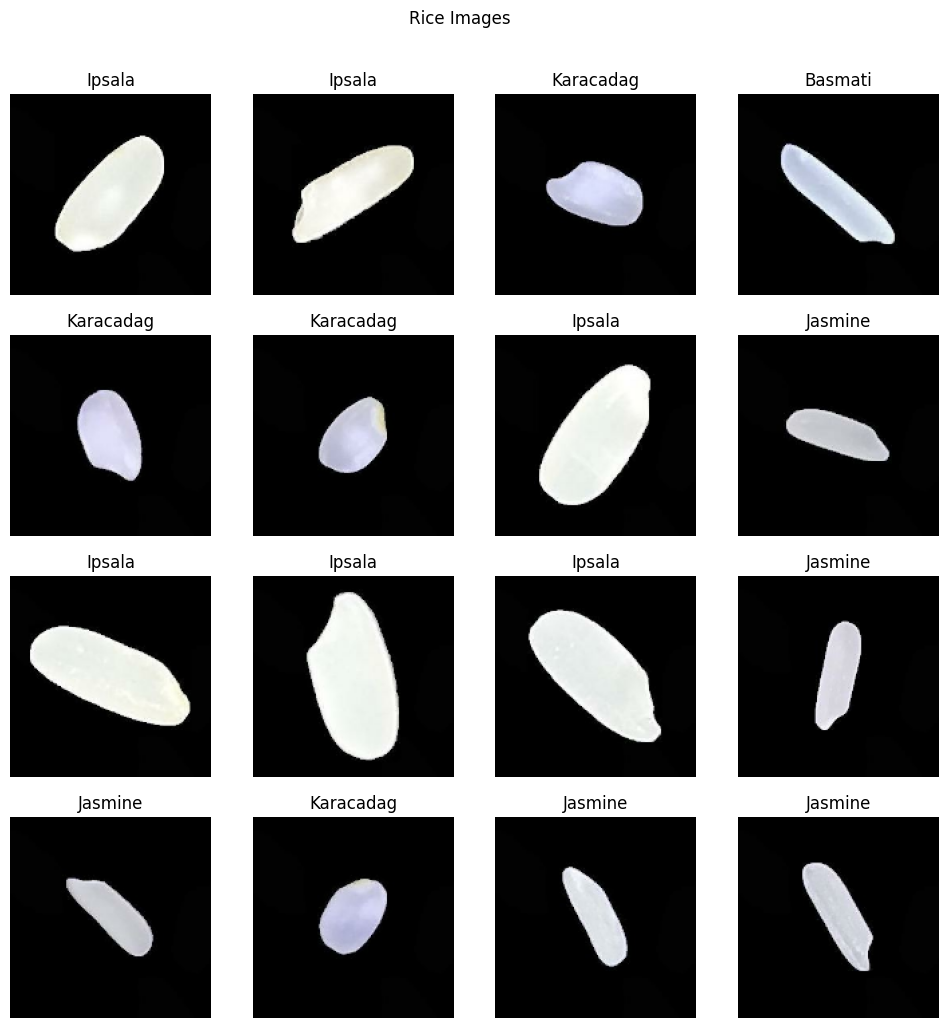

In [17]:
# visualize the data to verify is in the correct format
plt.figure(figsize=(12, 12))
for images, labels in Train.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.suptitle('Rice Images', y=0.95)
plt.show()

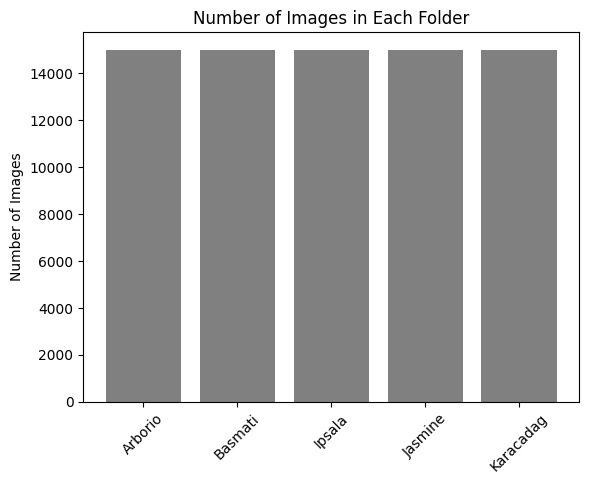

In [18]:
#### plot the classes distribution
labels = []
counts = []

for label in class_names:
    folder = os.path.join(data_path, label)
    count = len([f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])
    labels.append(label)
    counts.append(count)

plt.bar(labels, counts, color='gray')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Folder')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()

### *Observations: 75,000 rice images from 5 different classes (15,000 each) "equal distribution" to the CNN method, which has the ability to classify raw images without requiring pre-processing the data*

## *Building Train & Test Model*
### *To find and appropriate model size, started with few layers and parameters, Then slowly adding new layers until seeing the returns in validation loss becoming less*

### *CNN first Model: 1 conv layer | 1 pool layer | 2 Dense layer | ReLU activation*

In [19]:
# Build CNN first Model: 1 conv layer | 1 pool layer | 2 Dense layer | ReLU activation
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=300, activation='relu'),
        tf.keras.layers.Dense(units=5),
    ]
)

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 300)               52569900  
                                                                 
 dense_3 (Dense)             (None, 5)                 1505      
                                                      

### *Using function compile_and_fit(), to compile and fit the model*

In [20]:
### Compile model and fit model on dataset based on input model until find best epoch
### model: created model
### optimizer: defined optimizer
### max_epochs: Number of epochs

def compile_and_fit(model, optimizer=None, max_epochs=2):
    
    if optimizer is None:
        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
        
    # compile model before train
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    # train model
    history = model.fit(
        Train,
        epochs=max_epochs,
        validation_data=Validation,
        callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss' , patience=8),
    )
    return history

In [21]:
# train model_1 and store results
model_hist = compile_and_fit(model_1, max_epochs=10)

Epoch 1/10


3282/3282 [==============================] - 5204s 2s/step - loss: 0.1129 - accuracy: 0.9654 - val_loss: 0.0606 - val_accuracy: 0.9795
Epoch 2/10
3282/3282 [==============================] - 5397s 2s/step - loss: 0.0443 - accuracy: 0.9849 - val_loss: 0.0502 - val_accuracy: 0.9836
Epoch 3/10
3282/3282 [==============================] - 5283s 2s/step - loss: 0.0371 - accuracy: 0.9865 - val_loss: 0.0842 - val_accuracy: 0.9780
Epoch 4/10
3282/3282 [==============================] - 4872s 1s/step - loss: 0.0252 - accuracy: 0.9912 - val_loss: 0.1318 - val_accuracy: 0.9663
Epoch 5/10
3282/3282 [==============================] - 4909s 1s/step - loss: 0.0224 - accuracy: 0.9918 - val_loss: 0.1586 - val_accuracy: 0.9624
Epoch 6/10
3282/3282 [==============================] - 5118s 2s/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.0795 - val_accuracy: 0.9838
Epoch 7/10
3282/3282 [==============================] - 5147s 2s/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.1520 - val_accura

### *To analyze the error and check the results obtained from model_1 and compare the accuracy of train and, we define the following 3 functions: 
- plot_comparision_result: plot accuracy and loss for train and validation 
- plot_confusion_matrix: plot confusion matrix for error analysis 
- get_ture_and_pred_labels(): get ground truth labels and predictions to use in plot_confusion_matrix*

In [22]:
### Plot diagram of accuracy and loss for train and validation set
### model: created model
    
def plot_comparision_result(model):
  
    fig, axs = plt.subplots(2, 1, figsize=(8, 10))
    
    # Plot train and validation accuracy
    axs[0].plot(model.history['accuracy'], color="red", marker="o")
    axs[0].plot(model.history['val_accuracy'], color="blue", marker="h")
    axs[0].set_title('Accuracy Comparison between Train & Validation Set')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Validation'], loc="lower right")
    
    # Plot train and validation loss
    axs[1].plot(model.history['loss'], color="red", marker="o")
    axs[1].plot(model.history['val_loss'], color="blue", marker="h")
    axs[1].set_title('Loss Comparison between Train & Validation Set')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Validation'], loc="upper right")

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
### This function plots the confusion matrix.
### cm(array): confusion matrix
### classes(dictionary): classes of our target (key=categorical type, value=numerical type)

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, [f"{value}={key}" for key , value in classes.items()], rotation=45)
    plt.yticks(tick_marks, [f"{value}={key}" for key , value in classes.items()])

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]}\n{cm[i,j]/np.sum(cm)*100:.2f}%",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()
    
# -----------------------------------------------------------------
### Get out 2 list include y_true and y_pred for use in confusion_matrix
### dataset: dataset include images and label
### model: created model

def get_ture_and_pred_labels(dataset, model):
    
    y_true = []
    y_pred = []
    
    for images, labels in dataset:
        labels = labels.numpy()
        outputs = tf.nn.softmax(model(images))
        pred = tf.argmax(outputs, axis=1).numpy()
        images = images.numpy()
        
        y_true = np.append(y_true, labels)
        y_pred = np.append(y_pred, pred)
    
    return y_true, y_pred

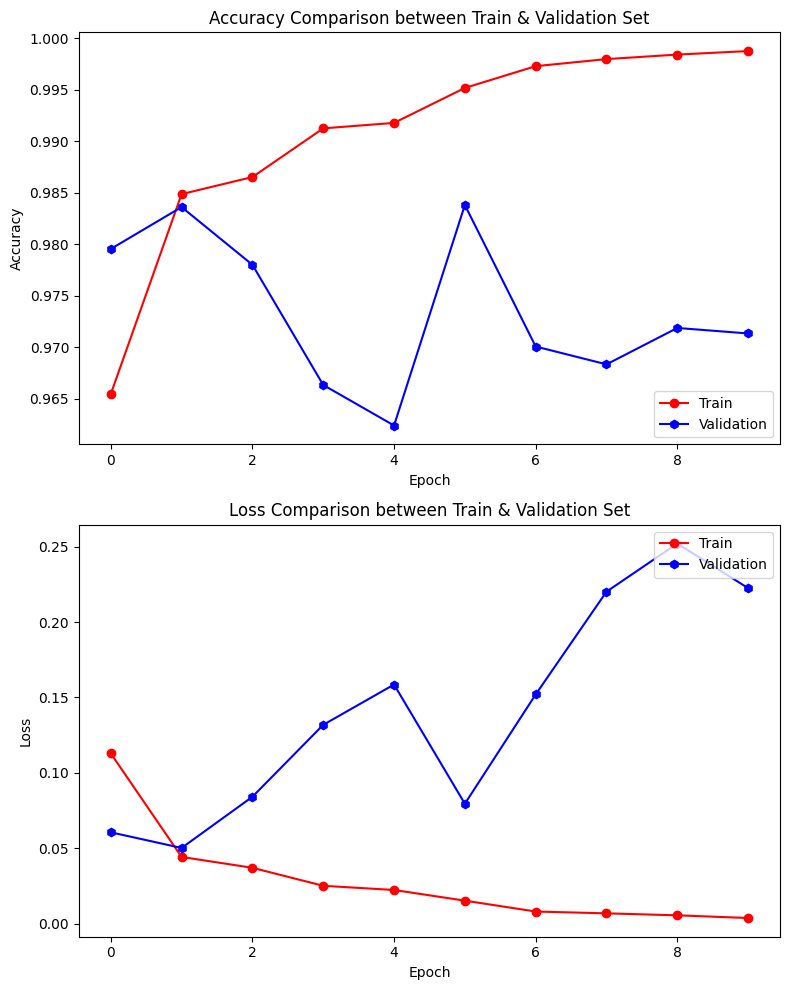

In [23]:
plot_comparision_result(model_hist)

### *Observations - the model is overfitting, the values of validation accuracy are lower than train accuracy*

### *Saving/Loading model_1*

In [24]:
import pickle

with  open ('model_1.pkl', 'wb') as f:
    pickle.dump(model_1, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\rescaling
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-11-25 13:39:23         3131
metadata.json                                  2023-11-25 13:39:23           64
variables.h5                                   2023-11-25 13:39:36    630895440


In [25]:
### Loading model_1
with open('model_1.pkl', 'rb') as f:
    model_1 = pickle.load(f)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-11-25 13:39:22         3131
metadata.json                                  2023-11-25 13:39:22           64
variables.h5                                   2023-11-25 13:39:36    630895440
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\rescaling
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars


### *Observations - this model is overfitting, the values of validation accuracy are lower than train accuracy*

### *CNN second Model - Adding dropout to prevent overfitting*

In [26]:
# second CNN Model to prevent overfitting: add dorpout layer
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=5),
    ]
)

In [27]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 175232)            0         
                                                                 
 dense_4 (Dense)             (None, 300)               52569900  
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                      

In [45]:
# compile and train model_2
model_hist = compile_and_fit(model_2, max_epochs=10)

Epoch 1/10
3282/3282 [==============================] - 5037s 2s/step - loss: 0.1592 - accuracy: 0.9487 - val_loss: 0.0620 - val_accuracy: 0.9796
Epoch 2/10
3282/3282 [==============================] - 4765s 1s/step - loss: 0.0639 - accuracy: 0.9795 - val_loss: 0.0541 - val_accuracy: 0.9844
Epoch 3/10
3282/3282 [==============================] - 5275s 2s/step - loss: 0.0472 - accuracy: 0.9848 - val_loss: 0.0439 - val_accuracy: 0.9868
Epoch 4/10
3282/3282 [==============================] - 12932s 4s/step - loss: 0.0355 - accuracy: 0.9887 - val_loss: 0.0384 - val_accuracy: 0.9888
Epoch 5/10
3282/3282 [==============================] - 4869s 1s/step - loss: 0.0293 - accuracy: 0.9902 - val_loss: 0.1015 - val_accuracy: 0.9764
Epoch 6/10
3282/3282 [==============================] - 4736s 1s/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0456 - val_accuracy: 0.9879
Epoch 7/10
3282/3282 [==============================] - 4863s 1s/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.0605 

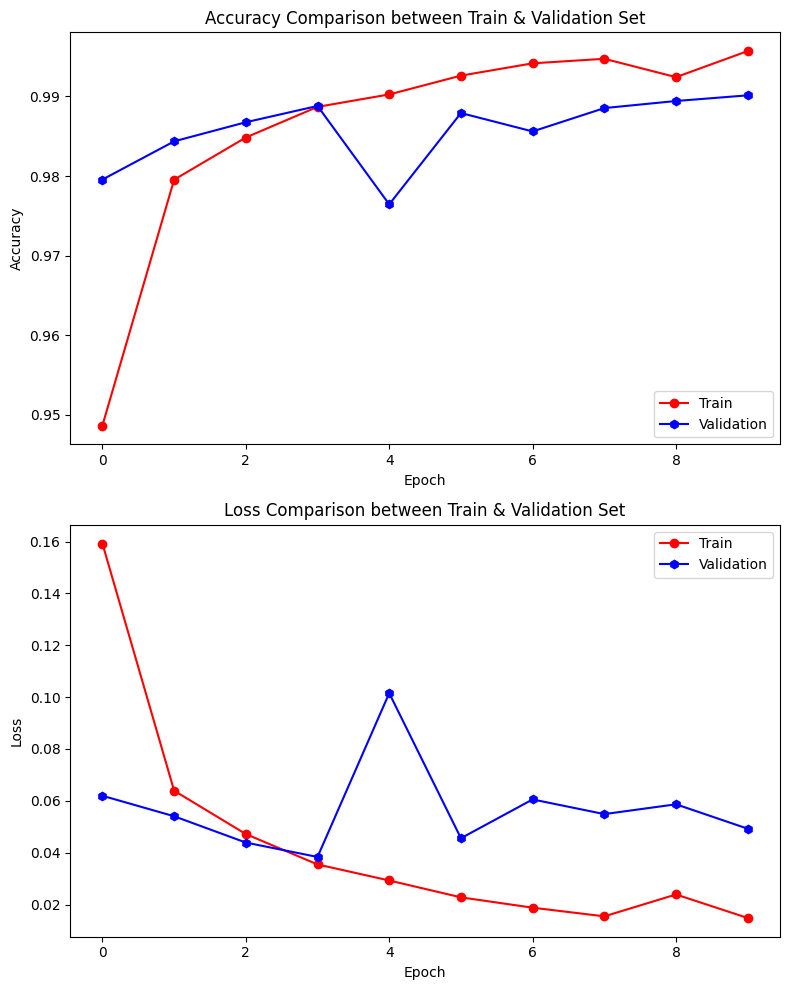

In [46]:
plot_comparision_result(model_hist)

## *After adding the Dropout layer, there is still overfitting, in the next model will add regularization*

### *Save/Load model_2*

In [28]:
import pickle

with  open ('model_2.pkl', 'wb') as f:
    pickle.dump(model_2, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\rescaling
......vars
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-11-25 13:43:40         2409
metadata.json                                  2023-11-25 13:43:40           64
variables.h5                                   2023-11-25 13:43:42    210306624


In [29]:
# Loading model_2
with open('model_2.pkl', 'rb') as f:
    model_2 = pickle.load(f)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-11-25 13:43:40         2409
metadata.json                                  2023-11-25 13:43:40           64
variables.h5                                   2023-11-25 13:43:42    210306624
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\rescaling
......vars
...vars


### *Third CNN Model to prevent overffiting: by add regularization-L2*

In [30]:
# Building third CNN Model to prevent overffiting: by add regularization-L2
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=300, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=5),
    ]
)

model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 175232)            0         
                                                                 
 dense_6 (Dense)             (None, 300)               52569900  
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                      

In [31]:
# compile and train model_3
model_hist = compile_and_fit(model_3, max_epochs=10)

Epoch 1/10


3282/3282 [==============================] - 6019s 2s/step - loss: 0.5808 - accuracy: 0.9211 - val_loss: 0.3982 - val_accuracy: 0.9679
Epoch 2/10
3282/3282 [==============================] - 6239s 2s/step - loss: 0.3975 - accuracy: 0.9476 - val_loss: 0.3168 - val_accuracy: 0.9705
Epoch 3/10
3282/3282 [==============================] - 6320s 2s/step - loss: 0.3458 - accuracy: 0.9540 - val_loss: 0.3041 - val_accuracy: 0.9731
Epoch 4/10
3282/3282 [==============================] - 6602s 2s/step - loss: 0.3258 - accuracy: 0.9575 - val_loss: 0.2922 - val_accuracy: 0.9718
Epoch 5/10
3282/3282 [==============================] - 5653s 2s/step - loss: 0.3202 - accuracy: 0.9592 - val_loss: 0.2581 - val_accuracy: 0.9773
Epoch 6/10
3282/3282 [==============================] - 6305s 2s/step - loss: 0.3116 - accuracy: 0.9596 - val_loss: 0.2397 - val_accuracy: 0.9782
Epoch 7/10
3282/3282 [==============================] - 6408s 2s/step - loss: 0.3029 - accuracy: 0.9599 - val_loss: 0.2811 - val_accura

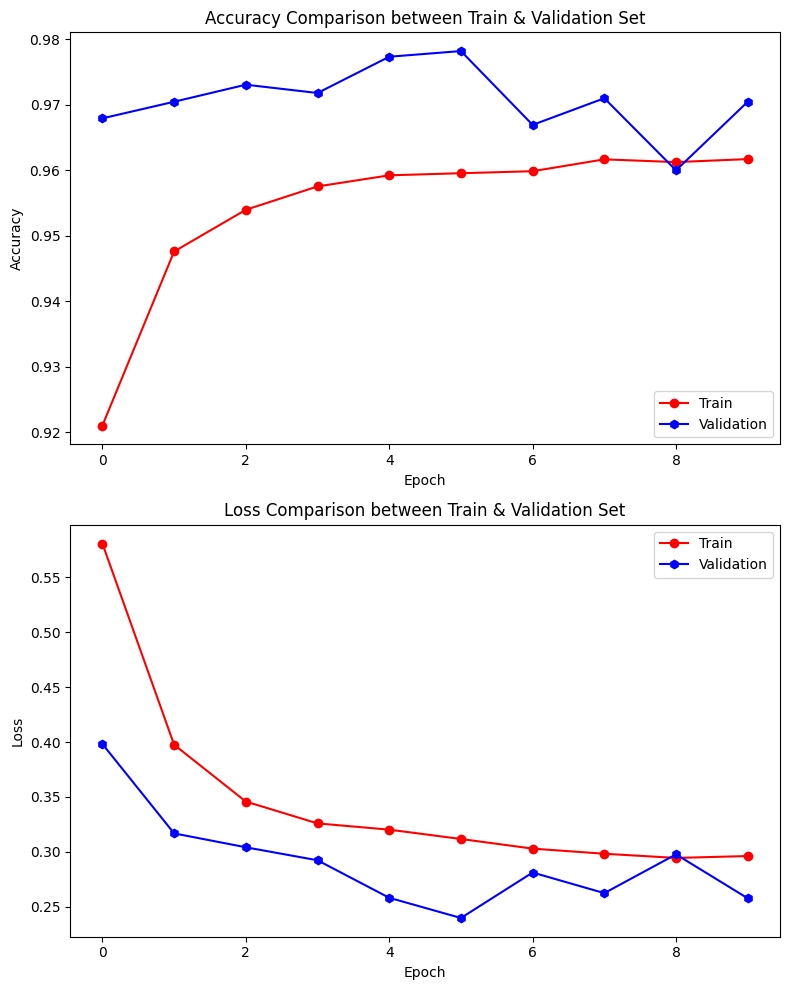

In [32]:
# plot result of model_3
plot_comparision_result(model_hist)

### *The get the model that isn't overfit and provides good accuracy. will check the result obtained in the model using the confusion matrix and see which classes the model is less accurate in predicting*

### *Saving/Loading model_3*

In [33]:
#save model_3
import pickle

with open ('model_3.pkl', 'wb') as f:
    pickle.dump(model_3, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\rescaling
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-11-26 09:54:56         3392
metadata.json                                  2023-11-26 09:54:56           64
variables.h5                                   2023-11-26 09:55:17    630897176


In [34]:
# Loading model_3
with open('model_3.pkl', 'rb') as f:
    model_3 = pickle.load(f)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-11-26 09:54:56         3392
metadata.json                                  2023-11-26 09:54:56           64
variables.h5                                   2023-11-26 09:55:16    630897176
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\rescaling
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars


              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96      3000
         1.0       0.94      0.99      0.96      3000
         2.0       1.00      0.99      1.00      3000
         3.0       0.98      0.94      0.96      3000
         4.0       0.95      1.00      0.97      3000

    accuracy                           0.97     15000
   macro avg       0.97      0.97      0.97     15000
weighted avg       0.97      0.97      0.97     15000
 




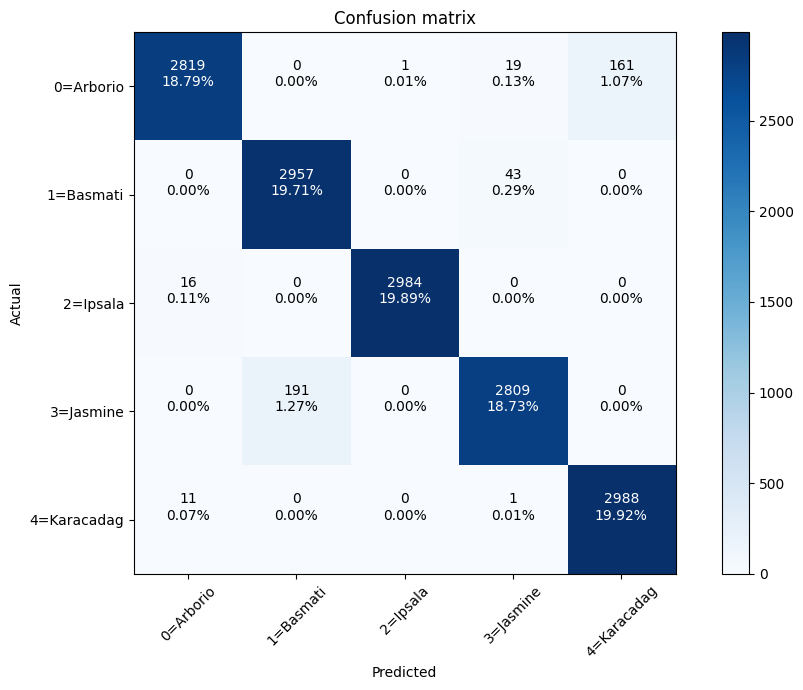

In [35]:
# plot confusion matrix for error analysis
y_true_val, y_pred_val = get_ture_and_pred_labels(Validation, model_3)

print(classification_report(y_true_val, y_pred_val), '\n\n')
cm = confusion_matrix(y_true_val, y_pred_val)

classes = {
    "Arborio":0,
    "Basmati":1,
    "Ipsala":2,
    "Jasmine":3,
    "Karacadag":4,
}

plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

### *Based on the results; Ipsala rices are well classified, but with small errors in the classification of other rice types.*


### *Fourth CNN Model: by add the other Dense layer with 300 units*

In [36]:
# Build fourth CNN Model: by add the other Dense layer with 300 units
model_4 = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=300, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(units=100, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=5),
    ]
)

model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 175232)            0         
                                                                 
 dense_8 (Dense)             (None, 300)               52569900  
                                                                 
 dense_9 (Dense)             (None, 100)               30100     
                                                      

In [37]:
# complie and train model_4
model_hist = compile_and_fit(model_4, max_epochs=10)

Epoch 1/10
3282/3282 [==============================] - 6781s 2s/step - loss: 0.4230 - accuracy: 0.9260 - val_loss: 0.2480 - val_accuracy: 0.9513
Epoch 2/10
3282/3282 [==============================] - 10728s 3s/step - loss: 0.2303 - accuracy: 0.9530 - val_loss: 0.1768 - val_accuracy: 0.9632
Epoch 3/10
3282/3282 [==============================] - 7914s 2s/step - loss: 0.1949 - accuracy: 0.9582 - val_loss: 0.1739 - val_accuracy: 0.9628
Epoch 4/10
3282/3282 [==============================] - 5266s 2s/step - loss: 0.1785 - accuracy: 0.9612 - val_loss: 0.1514 - val_accuracy: 0.9668
Epoch 5/10
3282/3282 [==============================] - 5877s 2s/step - loss: 0.1628 - accuracy: 0.9647 - val_loss: 0.1381 - val_accuracy: 0.9717
Epoch 6/10
3282/3282 [==============================] - 6117s 2s/step - loss: 0.1484 - accuracy: 0.9686 - val_loss: 0.1222 - val_accuracy: 0.9757
Epoch 7/10
3282/3282 [==============================] - 6198s 2s/step - loss: 0.1334 - accuracy: 0.9740 - val_loss: 0.1156 

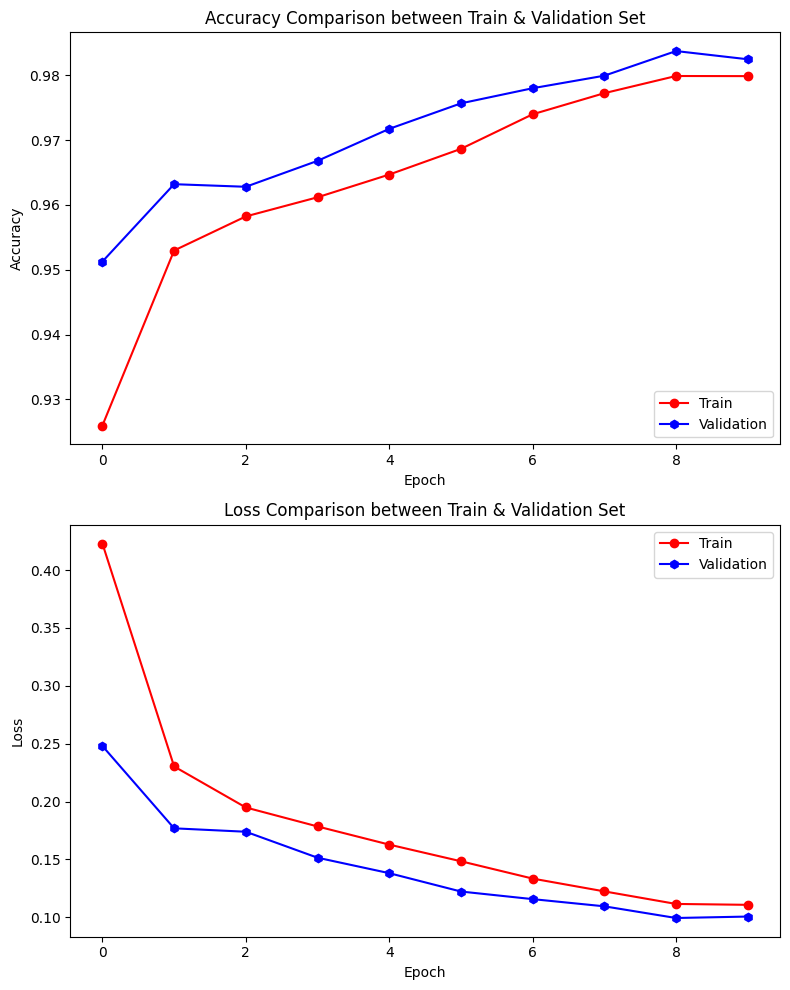

In [38]:
# show result of model_4
plot_comparision_result(model_hist)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      3000
         1.0       0.96      0.99      0.97      3000
         2.0       1.00      1.00      1.00      3000
         3.0       0.98      0.95      0.97      3000
         4.0       0.99      0.99      0.99      3000

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000
 




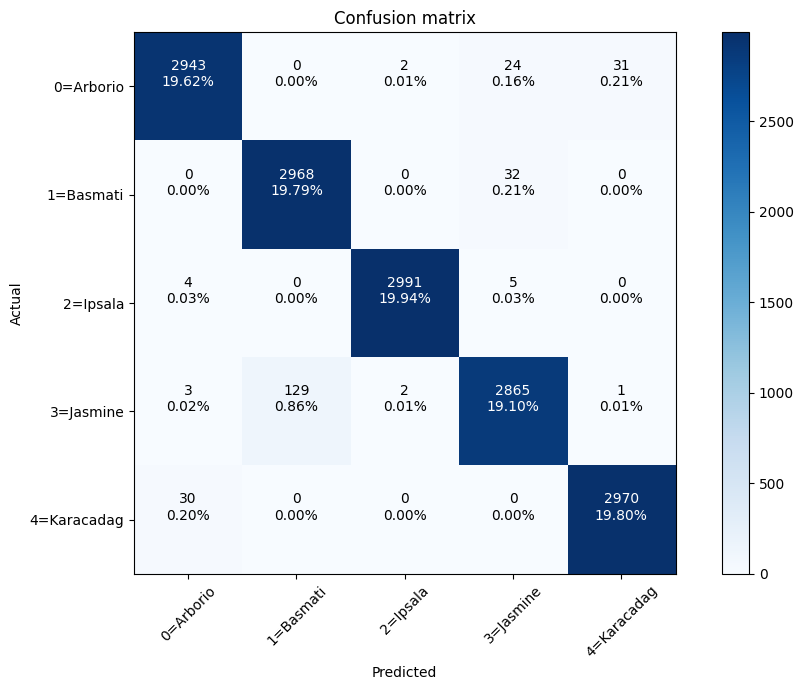

In [39]:
# plot confusion matrix for error analysis
y_true_val, y_pred_val = get_ture_and_pred_labels(Validation, model_4)

print(classification_report(y_true_val, y_pred_val), '\n\n')
cm = confusion_matrix(y_true_val, y_pred_val)

classes = {
    "Arborio":0,
    "Basmati":1,
    "Ipsala":2,
    "Jasmine":3,
    "Karacadag":4,
}

plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [40]:
import pickle  

with open ('model_4.pkl', 'wb') as f:
    pickle.dump(model_4, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\rescaling
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-11-27 06:25:54         3875
metadata.json                                  2023-11-27 06:25:54           64
va

In [41]:
## Load
with open('model_4.pkl', 'rb') as f:
    model_4 = pickle.load(f)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-11-27 06:25:54         3875
metadata.json                                  2023-11-27 06:25:54           64
variables.h5                                   2023-11-27 06:26:14    631250680
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\rescaling
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
......

### *CNN fifth Model: by two Conv2D layer*

### *CNN sixth Model: by two Conv2D and 2 MaxPool2D and 1 Dense layer*

### *Select the best model*

In [42]:
# Save the entire model to a HDF5 file.
model_4.save('my_model.h5')

In [43]:
# select best model
# Recreate the exact same model, including its weights and the optimizer
final_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
final_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 175232)            0         
                                                                 
 dense_8 (Dense)             (None, 300)               52569900  
                                                                 
 dense_9 (Dense)             (None, 100)               30100     
                                                      

In [44]:
# Evaluating Final model and checking accuracy and loss
test_loss, test_acc = final_model.evaluate(Test, verbose=2)
print(f'\nTest accuracy:{test_acc} (test_loss: {test_loss})')

704/704 - 199s - loss: 0.0978 - accuracy: 0.1993 - 199s/epoch - 283ms/step

Test accuracy:0.19928888976573944 (test_loss: 0.09776999056339264)


              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2250
         1.0       0.96      0.99      0.97      2250
         2.0       1.00      1.00      1.00      2250
         3.0       0.98      0.96      0.97      2250
         4.0       0.99      0.99      0.99      2250

    accuracy                           0.98     11250
   macro avg       0.98      0.98      0.98     11250
weighted avg       0.98      0.98      0.98     11250
 




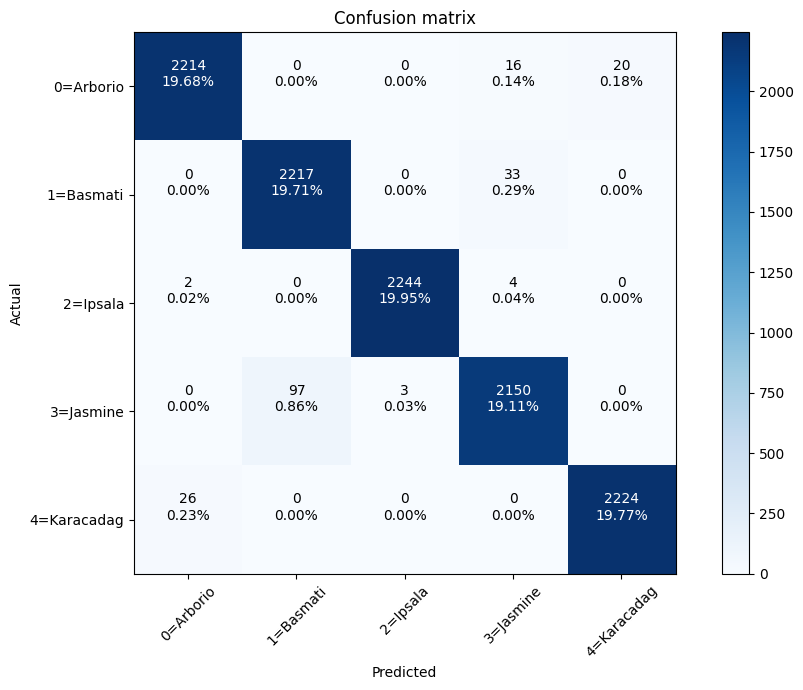

In [45]:
# plot confusion matrix for error analysis
y_true_test, y_pred_test = get_ture_and_pred_labels(Test, final_model)

print(classification_report(y_true_test, y_pred_test), '\n\n')
cm = confusion_matrix(y_true_test, y_pred_test)

classes = {
    "Arborio":0,
    "Basmati":1,
    "Ipsala":2,
    "Jasmine":3,
    "Karacadag":4,
}

plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)


### *Visualize result of Final Model*

In [46]:
for images, labels in Test:
    test_labels = labels
    predictions = tf.nn.softmax(final_model(images))
    test_images = images
    break

In [47]:
# check prediction
print(f"Predicted Logits for First Image: {predictions[0]}") #Logits are the raw output values produced by the model before applying the activation function
print(f"Predicted Label for First Image: {np.argmax(predictions[0])}")

Predicted Logits for First Image: [9.9789017e-01 5.1926715e-08 1.0424580e-04 6.3109837e-05 1.9424503e-03]
Predicted Label for First Image: 0


In [52]:
### to plot each image
### i (int): image number
### predictions_array (tensor): prediction for input_image
### true_label (tensor): true label for input_image
### img (tensor): input_image

def plot_image(i, predictions_array, true_label, img):

    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.numpy().astype("uint8"))
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# -------------------------------------------------------------
### bar plot of predciton
### i (int): image number
### predictions_array (tensor): prediction array of image
### true_label (tensor): true label for image

def plot_value_array(i, predictions_array, true_label):    

    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(5))
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

# -----------------------------------------------------------------------------    
### Plot the first X test images, their predicted labels, and the true labels.
### predictions_array(): all predictions for all test_image
### test_labels(): all true label for all test_image
### test_images(): all test_image

def plot_final_result(predictions_array, test_labels, test_images, num_rows=10, num_cols=3):

    
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions_array[i], test_labels, test_images)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions_array[i], test_labels)
        
    plt.tight_layout()
    plt.show()

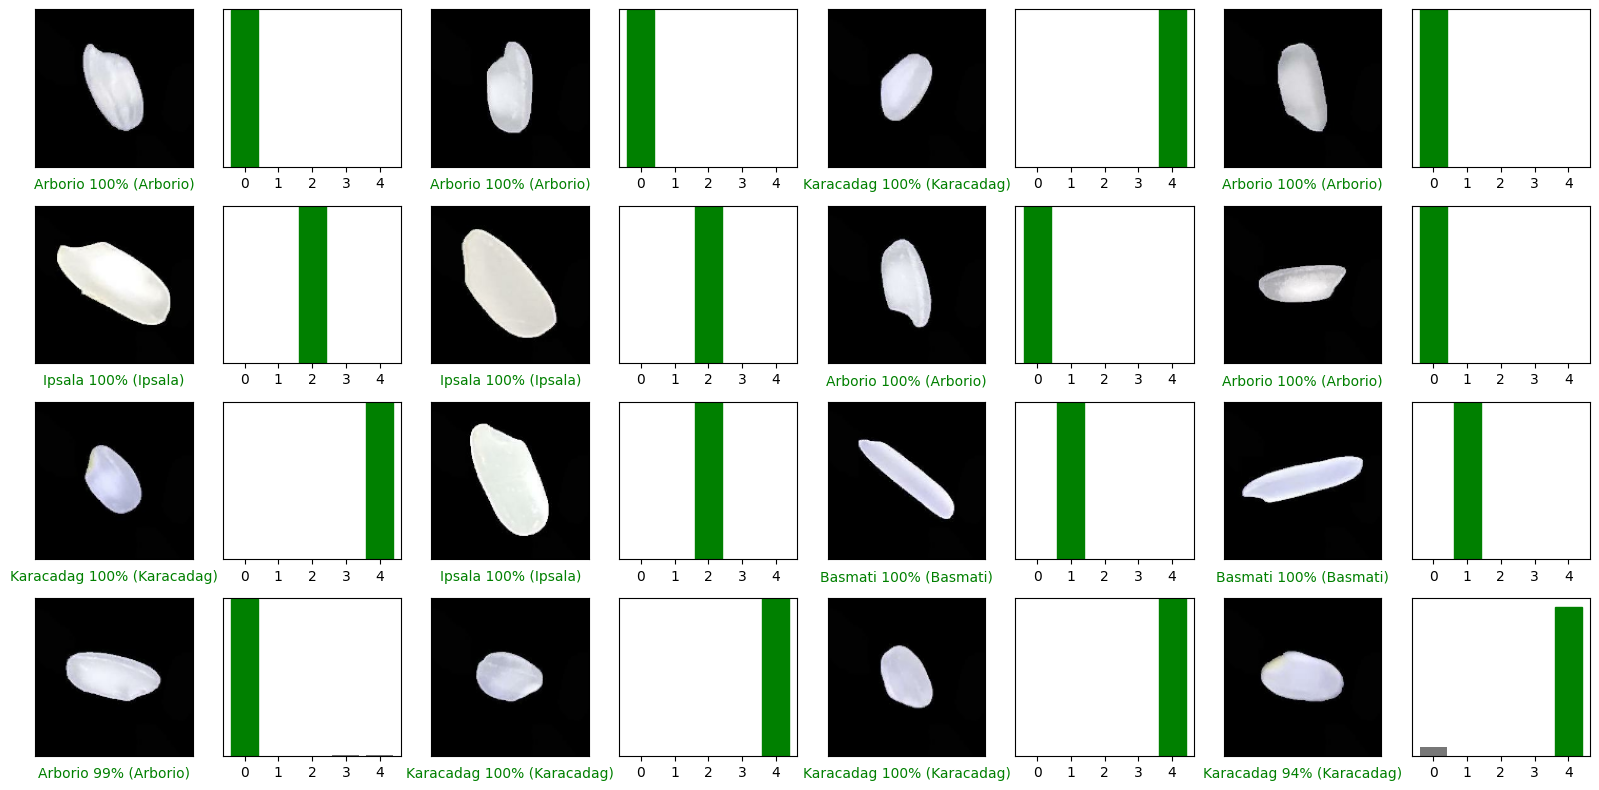

In [53]:
plot_final_result(predictions, test_labels, test_images, num_rows=4, num_cols=4)